In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Leitura e Tratamento dos dados

In [2]:
# EI: ensino infantil
# EF: ensino fundamental
# EM: ensino médio
# EJA: educação de jovens e adultos (f: fundamental; m: médio)
# EP: educação profissional
# ES: educação especial
# gn: grupo 1, grupo 2, grupo 3, grupo 4, grupo 5
# nvln: nível 1, nível 2, nível 3, nível 4, nível 5

# adequacao da formacao do docente
afd_cols    = ['ano', 'unidade_geografica', 'localizacao', 'dependencia_administrativa',
            'EI_g1', 'EI_g2', 'EI_g3', 'EI_g4', 'EI_g5',
            'EF_total_g1', 'EF_total_g2', 'EF_total_g3', 'EF_total_g4', 'EF_total_g5',
            'EF_anos_iniciais_g1', 'EF_anos_iniciais_g2', 'EF_anos_iniciais_g3', 'EF_anos_iniciais_g4', 'EF_anos_iniciais_g5',
            'EF_anos_finais_g1', 'EF_anos_finais_g2', 'EF_anos_finais_g3', 'EF_anos_finais_g4', 'EF_anos_finais_g5',
            'EM_g1', 'EM_g2', 'EM_g3', 'EM_g4', 'EM_g5',
            'EJAf_g1', 'EJAf_g2', 'EJAf_g3', 'EJAf_g4', 'EJAf_g5',
            'EJAm_g1', 'EJAm_g2', 'EJAm_g3', 'EJAm_g4', 'EJAm_g5']

# percentual dos docentes com curso superior
dsu_cols = ['ano', 'unidade_geografica', 'localizacao', 'dependencia_administrativa', 
           'EI_total', 'EI_creche', 'EI_pre_escola',
           'EF_total', 'EF_anos_iniciais', 'EF_anos_finais',
           'EM', 'EP', 'EJA', 'ES']

# regualridade do corpo docente
ird_cols = ['ano', 'unidade_geografica', 'localizacao', 'dependencia_administrativa', 
           'baixa_regularidade(0-|2)', 'media_baixa(2-|3)', 'media_alta(3-|4)', 'alta(4-|5)']

# esforco docente
ied_cols = ['ano', 'unidade_geografica', 'localizacao', 'dependencia_administrativa',
        'EF_total_nvl1', 'EF_total_nvl2','EF_total_nvl3', 'EF_total_nvl4', 'EF_total_nvl5',
        'EF_total_nvl6','EF_anos_iniciais_nvl1', 'EF_anos_iniciais_nvl2','EF_anos_iniciais_nvl3', 'EF_anos_iniciais_nvl4', 'EF_anos_iniciais_nvl5', 'EF_anos_iniciais_nvl6','EF_anos_finais_nvl1', 'EF_anos_finais_nvl2','EF_anos_finais_nvl3', 'EF_anos_finais_nvl4', 'EF_anos_finais_nvl5', 'EF_anos_finais_nvl6','EM_nvl1', 'EM_nvl2','EM_nvl3', 'EM_nvl4', 'EM_nvl5', 'EM_nvl6']

## 2018

In [3]:
df_AFD_2018 = pd.read_excel('extensionista/dados2018/AFD_BRASIL_REGIOES_UFS_2018.xlsx', names=afd_cols, header=None, skiprows=11, nrows=587, engine='openpyxl')
df_DSU_2018 = pd.read_excel('extensionista/dados2018/DSU_BRASIL_REGIOES_UFS_2018_ATUALIZADO.xlsx', names=dsu_cols, header=None, skiprows=10, nrows=587, engine='openpyxl')
df_IRD_2018 = pd.read_excel('extensionista/dados2018/IRD_BRASIL_REGIOES_UFS_2018.xlsx', names=ird_cols, header=None, skiprows=10, nrows=586, engine='openpyxl')
df_IED_2018 = pd.read_excel('extensionista/dados2018/IED_BRASIL_REGIOES_UFS_2018.xlsx', names = ied_cols,header=None,skiprows=11, nrows=586, engine='openpyxl')

In [4]:
float_cols = df_AFD_2018.columns.to_list()[4:]
df_AFD_2018[float_cols] = df_AFD_2018[float_cols].apply(pd.to_numeric, errors='coerce')
float_cols = df_IED_2018.columns.to_list()[4:]
df_IED_2018[float_cols] = df_IED_2018[float_cols].apply(pd.to_numeric, errors='coerce')

Filtrar as linhas para pegar apenas as regioes e excluir colunas que nao iremos utilizar

In [5]:
regioes_AFD_2018 = df_AFD_2018.drop(['EJAf_g1', 'EJAf_g2', 'EJAf_g3', 'EJAf_g4', 'EJAf_g5',
           'EJAm_g1', 'EJAm_g2', 'EJAm_g3', 'EJAm_g4', 'EJAm_g5'], axis=1).loc[:107]

regioes_DSU_2018 = df_DSU_2018.drop(['EP', 'EJA', 'ES'],axis=1).loc[:107]
regioes_IRD_2018 = df_IRD_2018.loc[:107]
regioes_IED_2018 = df_IED_2018.loc[:107]

## 2019

In [6]:
df_AFD_2019 = pd.read_excel('extensionista/dados2019/AFD_BRASIL_REGIOES_UFS_2019.xlsx', names=afd_cols, header=None, skiprows=11, nrows=587, engine='openpyxl')
df_DSU_2019 = pd.read_excel('extensionista/dados2019/DSU_BRASIL_REGIOES_UFS_2019.xlsx', names=dsu_cols, header=None, skiprows=10, nrows=587, engine='openpyxl')
df_IRD_2019 = pd.read_excel('extensionista/dados2019/IRD_BRASIL_REGIOES_UFS_2019.xlsx', names=ird_cols, header=None, skiprows=10, nrows=586, engine='openpyxl')
df_IED_2019 = pd.read_excel('extensionista/dados2019/IED_BRASIL_REGIOES_UFS_2019.xlsx', names = ied_cols,header=None,skiprows=11, nrows=586, engine='openpyxl')


Filtrar as linhas para pegar apenas as regioes e excluir colunas que nao iremos utilizar



In [7]:
regioes_AFD_2019 = df_AFD_2019.drop(['EJAf_g1', 'EJAf_g2', 'EJAf_g3', 'EJAf_g4', 'EJAf_g5',
           'EJAm_g1', 'EJAm_g2', 'EJAm_g3', 'EJAm_g4', 'EJAm_g5'], axis=1).loc[:107]

regioes_DSU_2019 = df_DSU_2019.drop(['EP', 'EJA', 'ES'],axis=1).loc[:107]
regioes_IRD_2019 = df_IRD_2019.loc[:107]
regioes_IED_2019 = df_IED_2019.loc[:107]

## 2022

In [8]:
df_AFD_2022 = pd.read_excel('extensionista/dados2022/AFD_BRASIL_REGIOES_UFS_2022.xlsx', names=afd_cols, header=None, skiprows=11, nrows=587, engine='openpyxl')
df_DSU_2022 = pd.read_excel('extensionista/dados2022/DSU_BRASIL_REGIOES_UFS_2022.xlsx', names=dsu_cols, header=None, skiprows=10, nrows=587, engine='openpyxl')
df_IRD_2022 = pd.read_excel('extensionista/dados2022/IRD_BRASIL_REGIOES_UFS_2022.xlsx', names=ird_cols, header=None, skiprows=10, nrows=586, engine='openpyxl')
df_IED_2022 = pd.read_excel('extensionista/dados2022/IED_BRASIL_REGIOES_UFS_2022.xlsx', names = ied_cols,header=None,skiprows=11, nrows=586, engine='openpyxl')


In [9]:
float_cols = df_AFD_2022.columns.to_list()[4:]
df_AFD_2022[float_cols] = df_AFD_2022[float_cols].apply(pd.to_numeric, errors='coerce')
float_cols = df_DSU_2022.columns.to_list()[4:]
df_DSU_2022[float_cols] = df_DSU_2022[float_cols].apply(pd.to_numeric, errors='coerce')
float_cols = df_IED_2022.columns.to_list()[4:]
df_IED_2022[float_cols] = df_IED_2022[float_cols].apply(pd.to_numeric, errors='coerce')

Filtrar as linhas para pegar apenas as regioes e excluir colunas que nao iremos utilizar


In [10]:
regioes_AFD_2022 = df_AFD_2022.drop(['EJAf_g1', 'EJAf_g2', 'EJAf_g3', 'EJAf_g4', 'EJAf_g5',
           'EJAm_g1', 'EJAm_g2', 'EJAm_g3', 'EJAm_g4', 'EJAm_g5'], axis=1).loc[:107]

regioes_DSU_2022 = df_DSU_2022.drop(['EP', 'EJA', 'ES'],axis=1).loc[:107]
regioes_IRD_2022 = df_IRD_2022.loc[:107]
regioes_IED_2022 = df_IED_2022.loc[:107]

## 2023

In [11]:
df_AFD_2023 = pd.read_excel('extensionista/dados2023/AFD_BRASIL_REGIOES_UFS_2023.xlsx', names=afd_cols, header=None, skiprows=11, nrows=587, engine='openpyxl')
df_DSU_2023 = pd.read_excel('extensionista/dados2023/DSU_BRASIL_REGIOES_UFS_2023.xlsx', names=dsu_cols, header=None, skiprows=10, nrows=587, engine='openpyxl')
df_IRD_2023 = pd.read_excel('extensionista/dados2023/IRD_BRASIL_REGIOES_UFS_2023.xlsx', names=ird_cols, header=None, skiprows=10, nrows=586, engine='openpyxl')
df_IED_2023 = pd.read_excel('extensionista/dados2023/IED_BRASIL_REGIOES_UFS_2023.xlsx', names = ied_cols,header=None,skiprows=11, nrows=586, engine='openpyxl')


In [12]:
float_cols = df_AFD_2023.columns.to_list()[4:]
df_AFD_2023[float_cols] = df_AFD_2023[float_cols].apply(pd.to_numeric, errors='coerce')
float_cols = df_DSU_2023.columns.to_list()[4:]
df_DSU_2023[float_cols] = df_DSU_2023[float_cols].apply(pd.to_numeric, errors='coerce')
float_cols = df_IED_2023.columns.to_list()[4:]
df_IED_2023[float_cols] = df_IED_2023[float_cols].apply(pd.to_numeric, errors='coerce')

Filtrar as linhas para pegar apenas as regioes e excluir colunas que nao iremos utilizar



In [13]:
regioes_AFD_2023 = df_AFD_2023.drop(['EJAf_g1', 'EJAf_g2', 'EJAf_g3', 'EJAf_g4', 'EJAf_g5',
           'EJAm_g1', 'EJAm_g2', 'EJAm_g3', 'EJAm_g4', 'EJAm_g5'], axis=1).loc[:107]

regioes_DSU_2023 = df_DSU_2023.drop(['EP', 'EJA', 'ES'],axis=1).loc[:107]
regioes_IRD_2023 = df_IRD_2023.loc[:107]
regioes_IED_2023 = df_IED_2023.loc[:107]

# Divisão entre regiões e ano

In [14]:
def filtrar_regioes_por_ano(dfs_por_ano, regioes=["Sul", "Sudeste", "Norte", "Nordeste", "Centro-Oeste", "Brasil"]):
    resultado = {}

    for ano, dfs in dfs_por_ano.items():  # ex: ano = 2018, dfs = {"AFD": df, "DSU": df, ...}
        for tipo, df in dfs.items():  # tipo = "AFD", "DSU", etc.
            for regiao in regioes:
                nome_var = f"Regiao_{regiao.replace('-', '')}_{tipo}_{ano}"
                resultado[nome_var] = df[df["unidade_geografica"] == regiao]
    
    return resultado

dfs_por_ano = {
    2018: {"AFD": regioes_AFD_2018, "DSU": regioes_DSU_2018, "IRD": regioes_IRD_2018, "IED": regioes_IED_2018},
    2019: {"AFD": regioes_AFD_2019, "DSU": regioes_DSU_2019, "IRD": regioes_IRD_2019, "IED": regioes_IED_2019},
    2022: {"AFD": regioes_AFD_2022, "DSU": regioes_DSU_2022, "IRD": regioes_IRD_2022, "IED": regioes_IED_2022},
    2023: {"AFD": regioes_AFD_2023, "DSU": regioes_DSU_2023, "IRD": regioes_IRD_2023, "IED": regioes_IED_2023},
}

regioes_filtradas = filtrar_regioes_por_ano(dfs_por_ano)

# Verificação para saber se todos possuem o mesmo shape

In [15]:
bases = ['AFD', 'DSU', 'IED', 'IRD']
anos = [2018, 2019, 2022, 2023]

# Comparar os dataframes com prefixo 'df_'
print("\nComparações para 'df_':")
dif_dfs = []
for base in bases:
    shape_2018 = globals()[f"df_{base}_2018"].shape

    for ano in anos:
        nome_df = f"df_{base}_{ano}"
        df = globals()[nome_df]
        same_shape = df.shape == shape_2018
        if not same_shape:
            print(f"{nome_df} → Shape diferente: {df.shape}, esperado: {shape_2018}")
            dif_dfs.append(nome_df)
if not dif_dfs:
    print("Todos os DataFrames 'df_' têm o mesmo shape que os de 2018.")
else:
    print("Alguns DataFrames 'df_' têm shape diferente dos de 2018.")

print()

# Comparar os dataframes com prefixo 'regioes_'
print("Comparações para 'regioes_':")
dif_regioes = []
for base in bases:
    shape_2018 = globals()[f"regioes_{base}_2018"].shape

    for ano in anos:
        nome_df = f"regioes_{base}_{ano}"
        df = globals()[nome_df]
        same_shape = df.shape == shape_2018
        if not same_shape:
            print(f"{nome_df} → Shape diferente: {df.shape}, esperado: {shape_2018}")
            dif_regioes.append(nome_df)

if not dif_regioes:
    print("Todos os DataFrames 'regioes_' têm o mesmo shape que os de 2018.")
else:
    print("Alguns DataFrames 'regioes_' têm shape diferente dos de 2018.")



Comparações para 'df_':
Todos os DataFrames 'df_' têm o mesmo shape que os de 2018.

Comparações para 'regioes_':
Todos os DataFrames 'regioes_' têm o mesmo shape que os de 2018.


# Estatística descritiva

In [16]:
def media(col):
    """Média de uma coluna (Series)"""
    return col.mean()

def desvio_padrao(col):
    """Desvio padrão (amostral) da coluna (Series)"""
    return col.std()

def coeficiente_variacao(col):
    """Coeficiente de variação (%). Se a média for zero, retorna inf"""
    media_col = col.mean()
    if media_col == 0:
        return float('inf')
    return (col.std() / media_col) * 100

# Correlação entre variáveis

In [17]:
def calcular_correlacoes_completas(dfs_por_ano, regioes=['Sul', 'Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste', 'Brasil']):
    os.makedirs('output/correlacoes', exist_ok=True)

    for ano, dfs in dfs_por_ano.items():
        with pd.ExcelWriter(f'output/correlacoes/correlacoes_{ano}.xlsx', engine='openpyxl') as writer:
            for regiao in regioes:
                df_afn = dfs['AFD'].loc[lambda df: df['unidade_geografica'] == regiao]
                df_dsu = dfs['DSU'].loc[lambda df: df['unidade_geografica'] == regiao]
                df_ird = dfs['IRD'].loc[lambda df: df['unidade_geografica'] == regiao]
                df_ied = dfs['IED'].loc[lambda df: df['unidade_geografica'] == regiao]

                if df_afn.empty and df_dsu.empty and df_ird.empty and df_ied.empty:
                    continue

                def prepara(df, prefix):
                    num = df.select_dtypes(include='number')
                    num.columns = [f'{prefix}_{c}' for c in num.columns]
                    return num.reset_index(drop=True)

                a = prepara(df_afn, 'AFD')
                b = prepara(df_dsu, 'DSU')
                c = prepara(df_ird, 'IRD')
                d = prepara(df_ied, 'IED')

                all_vars = pd.concat([a, b, c, d], axis=1)

                corr = all_vars.corr()

                # save sheet
                corr.to_excel(writer, sheet_name=regiao[:31])

calcular_correlacoes_completas(dfs_por_ano)

# Aplicação de estatística descritiva

In [18]:
def calcular_distribuicoes(dfs_por_ano, regioes=["Sul", "Sudeste", "Norte", "Nordeste", "Centro-Oeste", "Brasil"]):
    
    os.makedirs("output/metricas", exist_ok=True)

    for ano, dfs in dfs_por_ano.items():

        with pd.ExcelWriter(f'output/metricas/metricas_distribuicao_{ano}.xlsx', engine='openpyxl') as writer:
            for regiao in regioes:
                partes = []
                for base, df in dfs.items():
                    df_reg = df[df["unidade_geografica"] == regiao]
                    if df_reg.empty:
                        continue
                    num = df_reg.select_dtypes(include='number')
                    num.columns = [f"{base}_{c}" for c in num.columns]
                    partes.append(num)
                
                if not partes:
                    continue

                dados = pd.concat(partes, axis=0, ignore_index=True)

                resumo = pd.DataFrame({
                    'media':              dados.apply(media),
                    'desvio_padrao':      dados.apply(desvio_padrao),
                    'coef_variacao_%':    dados.apply(coeficiente_variacao),
                })

                resumo = resumo.round(2)

                # save sheet
                resumo.to_excel(writer, sheet_name=regiao[:31])

calcular_distribuicoes(dfs_por_ano)

# Plot das features de correlação mais extrema

In [19]:
def pares_correlacao_alta(ano, regiao, corte, pasta):
    
    arquivo = f'{pasta}/correlacoes_{ano}.xlsx'
    corr = pd.read_excel(arquivo, sheet_name=regiao, index_col=0)
    
    mask = corr.abs() > corte
    for idx in corr.index:
        mask.at[idx, idx] = False

    resultados = []
    for i in range(len(corr.index)):
        for j in range(i+1, len(corr.columns)):
            if mask.iat[i, j]:
                var_i = corr.index[i]
                var_j = corr.columns[j]
                val = corr.iat[i, j]
                resultados.append((var_i, var_j, val))
    
    df_pares = pd.DataFrame(resultados, columns=['var1', 'var2', 'correlacao'])
    
    df_positivos = df_pares[df_pares['correlacao'] >= corte].reset_index(drop=True)
    df_negativos = df_pares[df_pares['correlacao'] <= -corte].reset_index(drop=True)
    
    return df_positivos, df_negativos

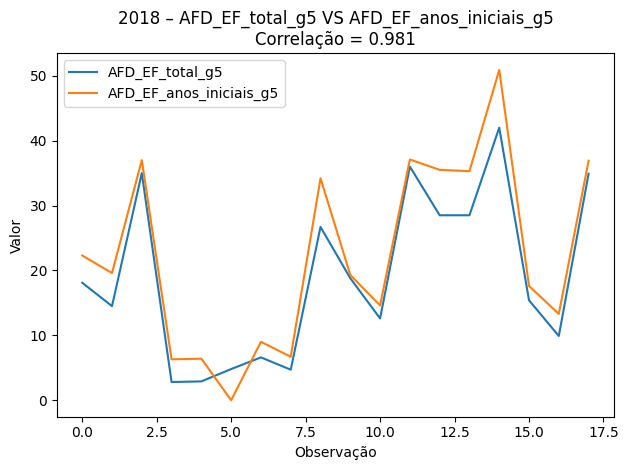

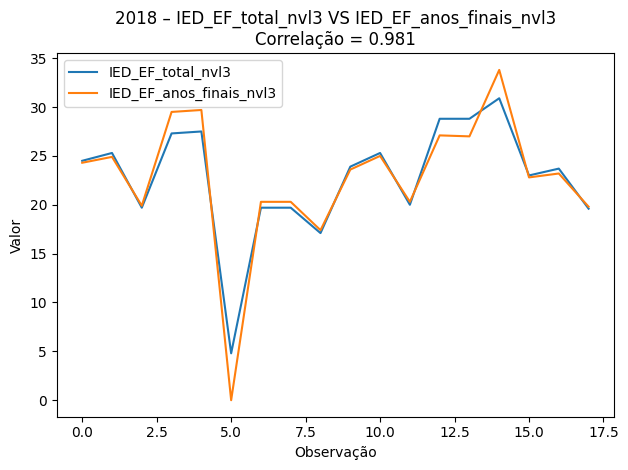

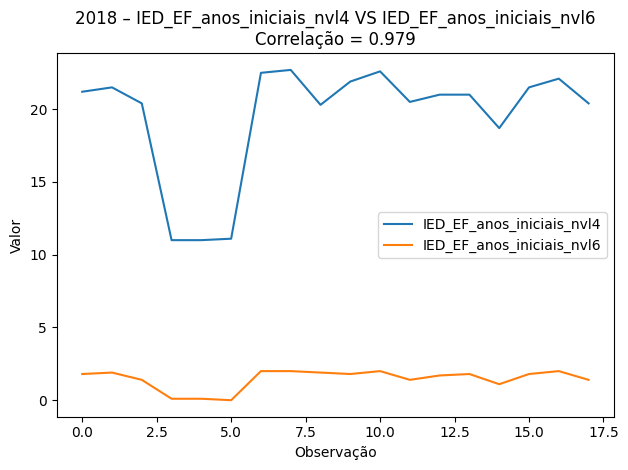

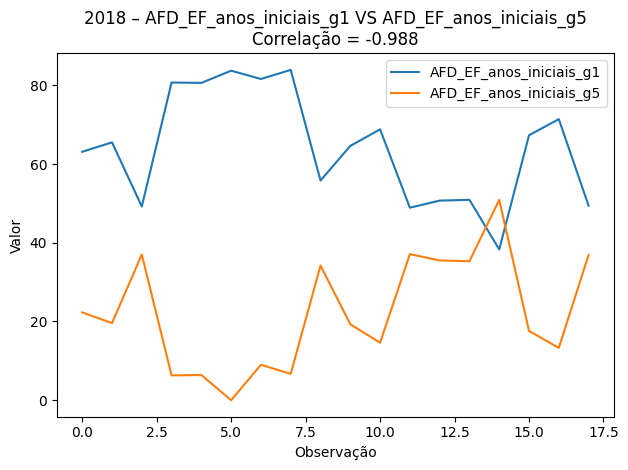

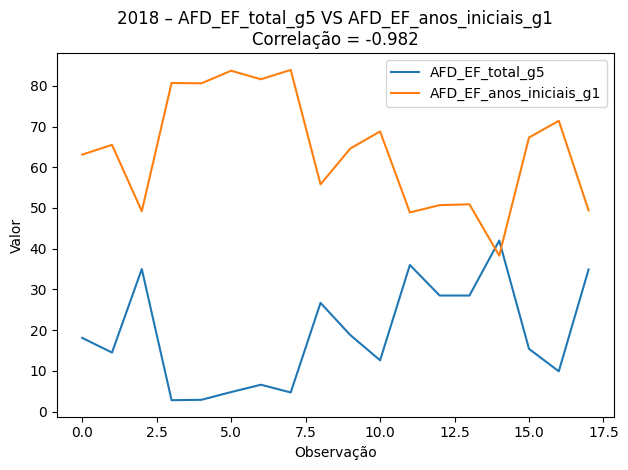

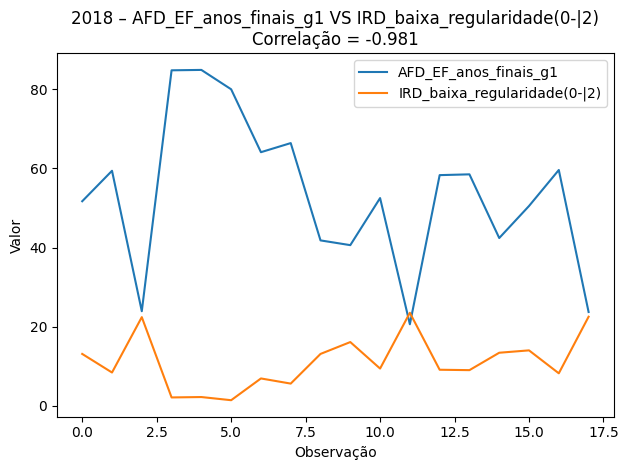

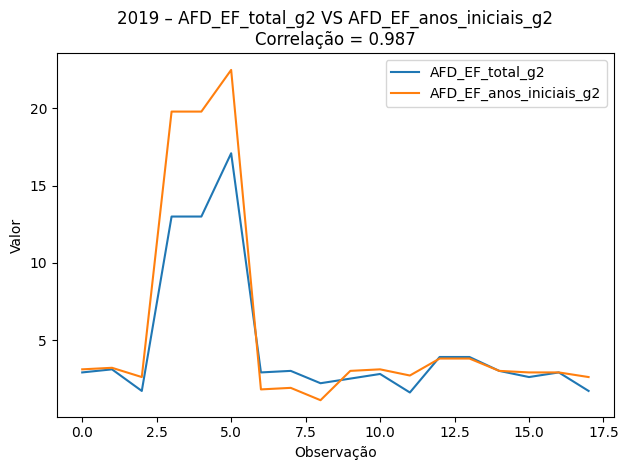

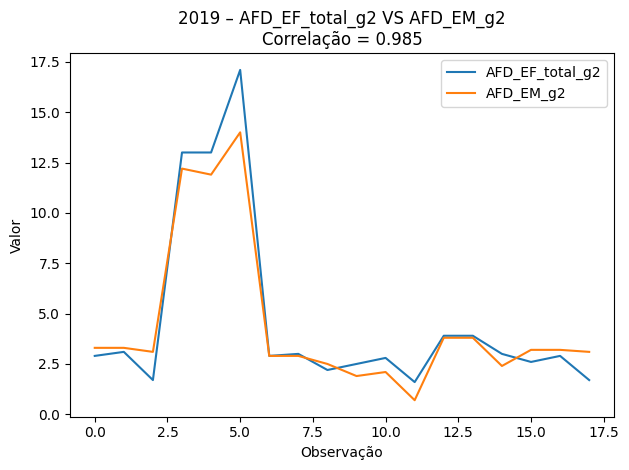

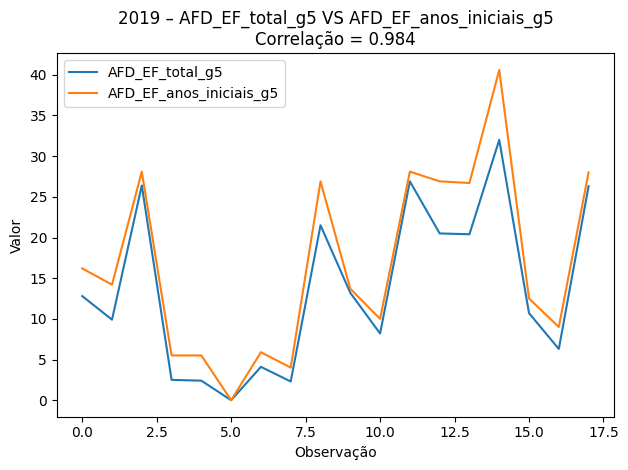

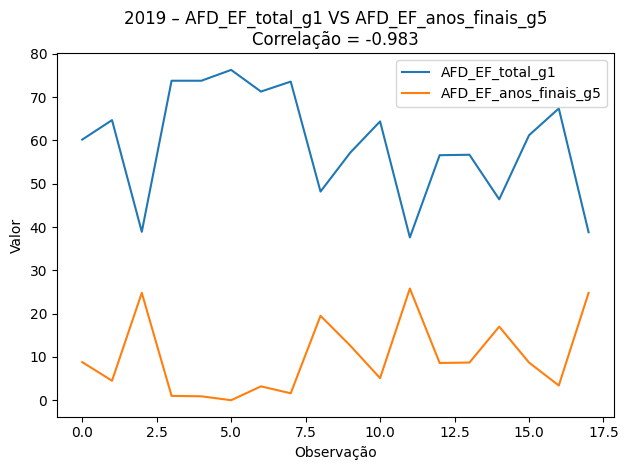

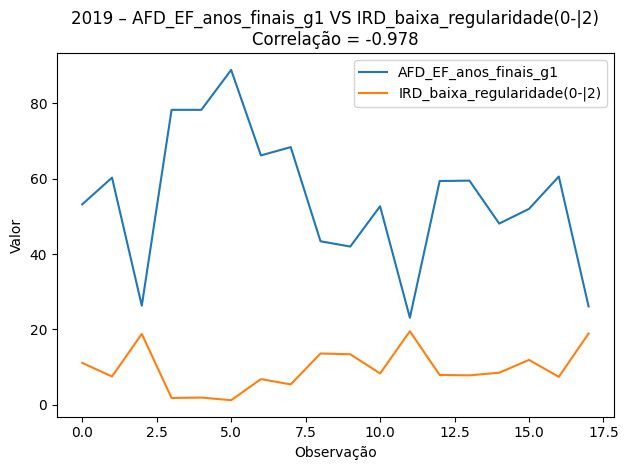

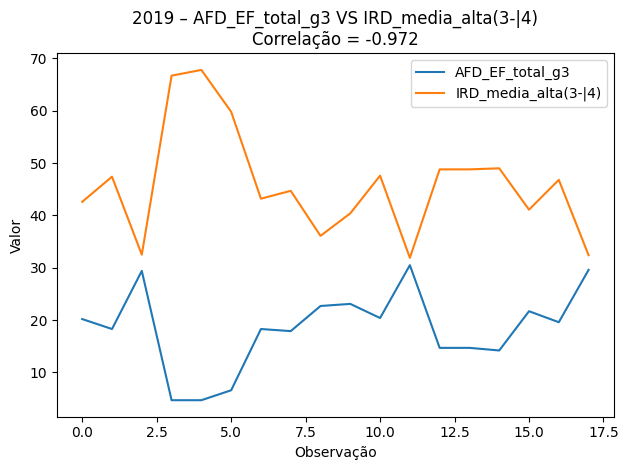

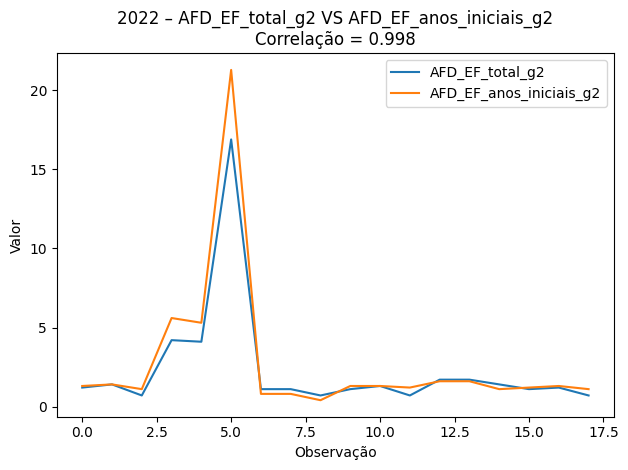

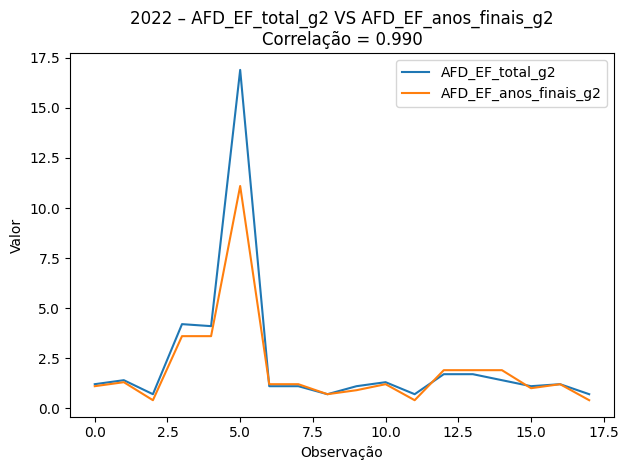

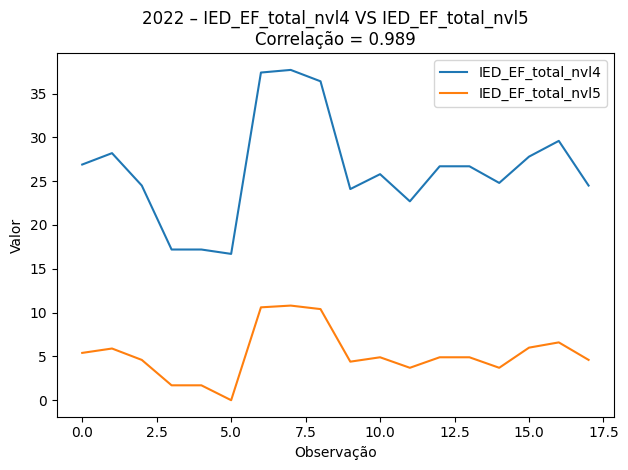

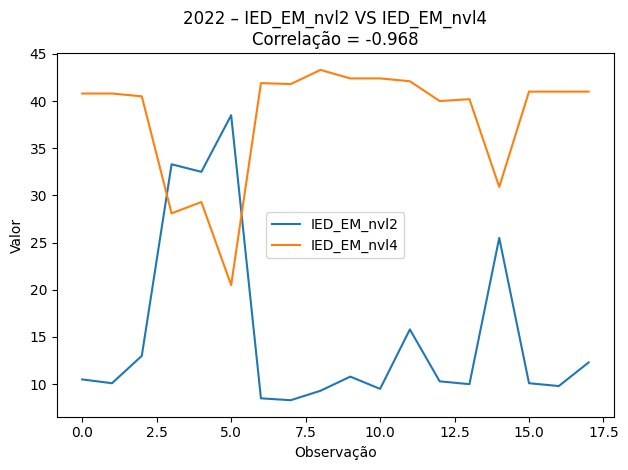

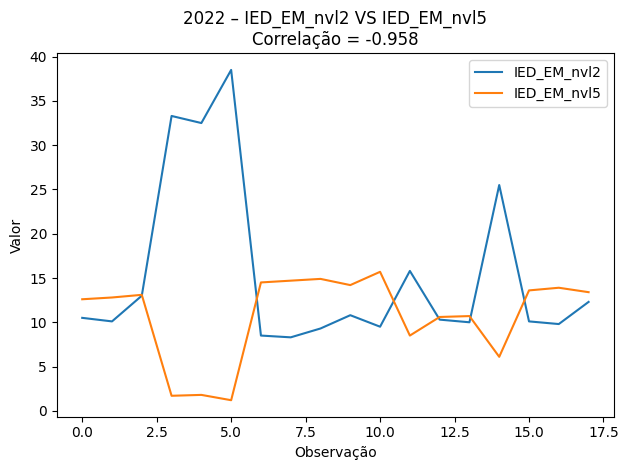

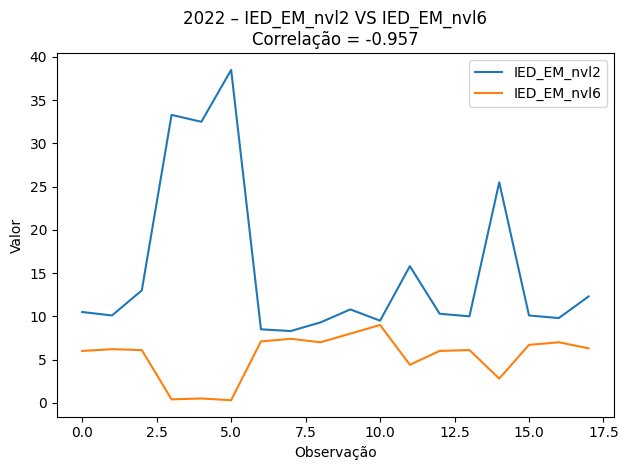

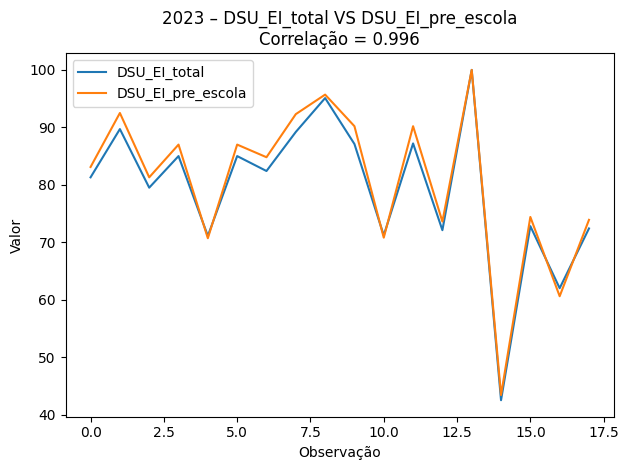

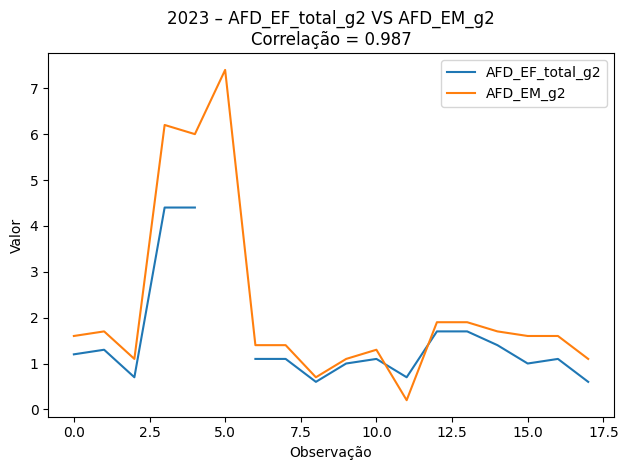

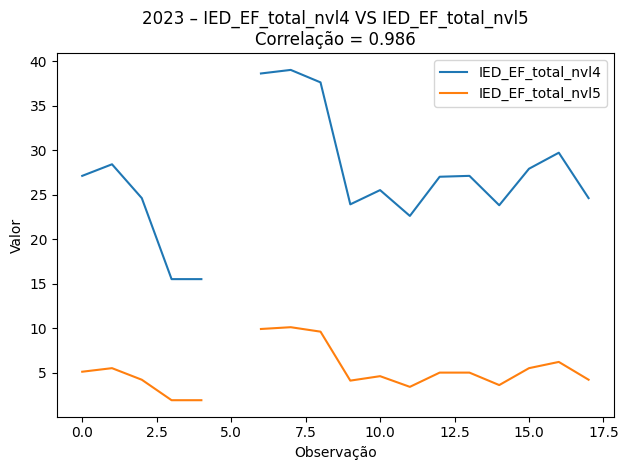

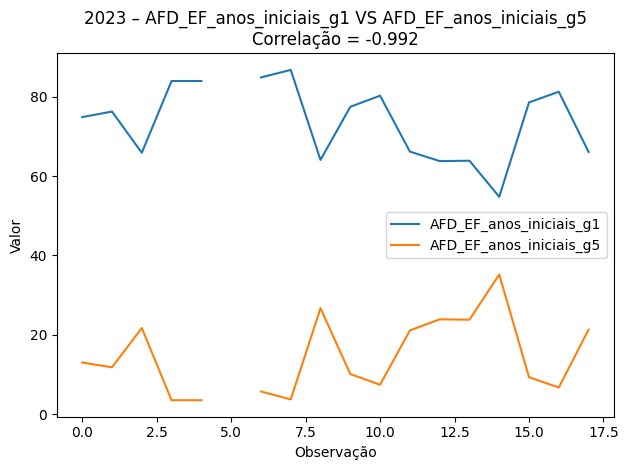

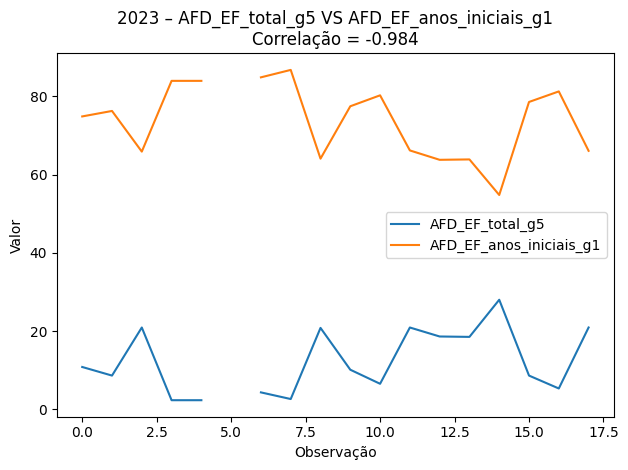

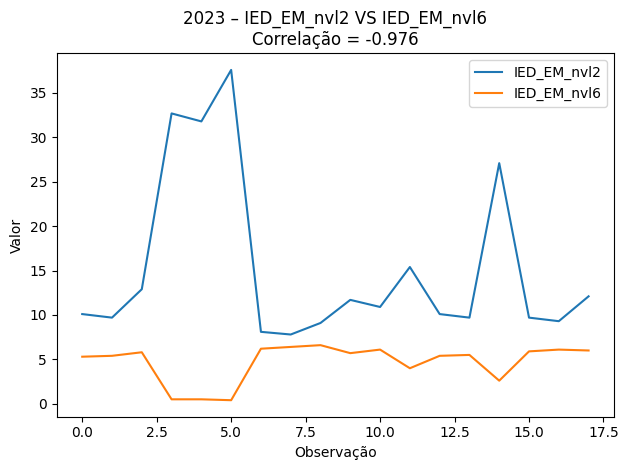

In [20]:
for ano in anos:
    df_pos, df_neg = pares_correlacao_alta(ano, 'Brasil', 0.7, pasta='output/correlacoes')
    
    top_pos = df_pos.nlargest(3, 'correlacao')
    top_neg = df_neg.nsmallest(3, 'correlacao')
    top3    = pd.concat([top_pos, top_neg], ignore_index=True)
    
    vars_pref = pd.unique(top3[['var1','var2']].values.ravel())
    
    blocos = []
    for base, df_base in dfs_por_ano[ano].items():
        df_b = df_base[df_base['unidade_geografica'] == 'Brasil']
        num = df_b.select_dtypes(include='number')
        # adiciona prefixo para corresponder a var1/var2
        num.columns = [f"{base}_{c}" for c in num.columns]
        blocos.append(num)
    df_region = pd.concat(blocos, axis=1).reset_index(drop=True)
    
    for _, row in top3.iterrows():
        v1, v2 = row['var1'], row['var2']
        if v1 in df_region.columns and v2 in df_region.columns:
            plt.figure()
            plt.plot(df_region.index, df_region[v1], label=v1)
            plt.plot(df_region.index, df_region[v2], label=v2)
            plt.title(f'{ano} – {v1} VS {v2}\nCorrelação = {row["correlacao"]:.3f}')
            plt.xlabel('Observação')
            plt.ylabel('Valor')
            plt.legend()
            plt.tight_layout()
            plt.show()
